# C3R2 SOM Generate
Generate a SOM for C3R2 from scratch.

In [2]:
from astropy.table import Table

import sys
sys.path.append('/opt/anaconda3/lib/python3.8/site-packages') #minisom location
sys.path.append('/Users/diana/Research/DESI-SOM/') #som codes location

import numpy as np

from som.utils import stack_vertically
from som.utils import generate_colors
from som.utils import normalize_data
from som.soms import generate_som
from som.soms import plot_som

In [3]:
# data path 
path = '/Users/diana/Research/DESI-SOM/data/Specz'

# import data
c3r2_cosmos_table = Table.read(f'{path}/lensing_cosmos_extended.fits')
c3r2_vvds_table = Table.read(f'{path}/lensing_vvds_extended.fits')

In [4]:
# vertically stack data
c3r2_table = stack_vertically(
                            c3r2_cosmos_table, 
                            c3r2_vvds_table, 
                            'lensing_cosmos_extended.fits', 
                            'lensing_vvds_extended.fits')

In [5]:
# generate table, array with colors
c3r2_w_colors_table, c3r2_colors_array = generate_colors(c3r2_table, 'UGRIZYJH', isMag = True); 

In [6]:
# normalize data
c3r2_colors_norm_array = normalize_data(c3r2_colors_array)

In [7]:
# generate som 
n = 35 #150
m = 30 #75
som, win_map = generate_som(n, m, c3r2_colors_norm_array)

initialized som...
training...
 [ 1000000 / 1000000 ] 100% - 0:00:00 left 
 quantization error: 0.10449385686544872


generating distance map...
generating median z map...


/Users/diana/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/diana/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


generating occupation map...
generating deep weights map...


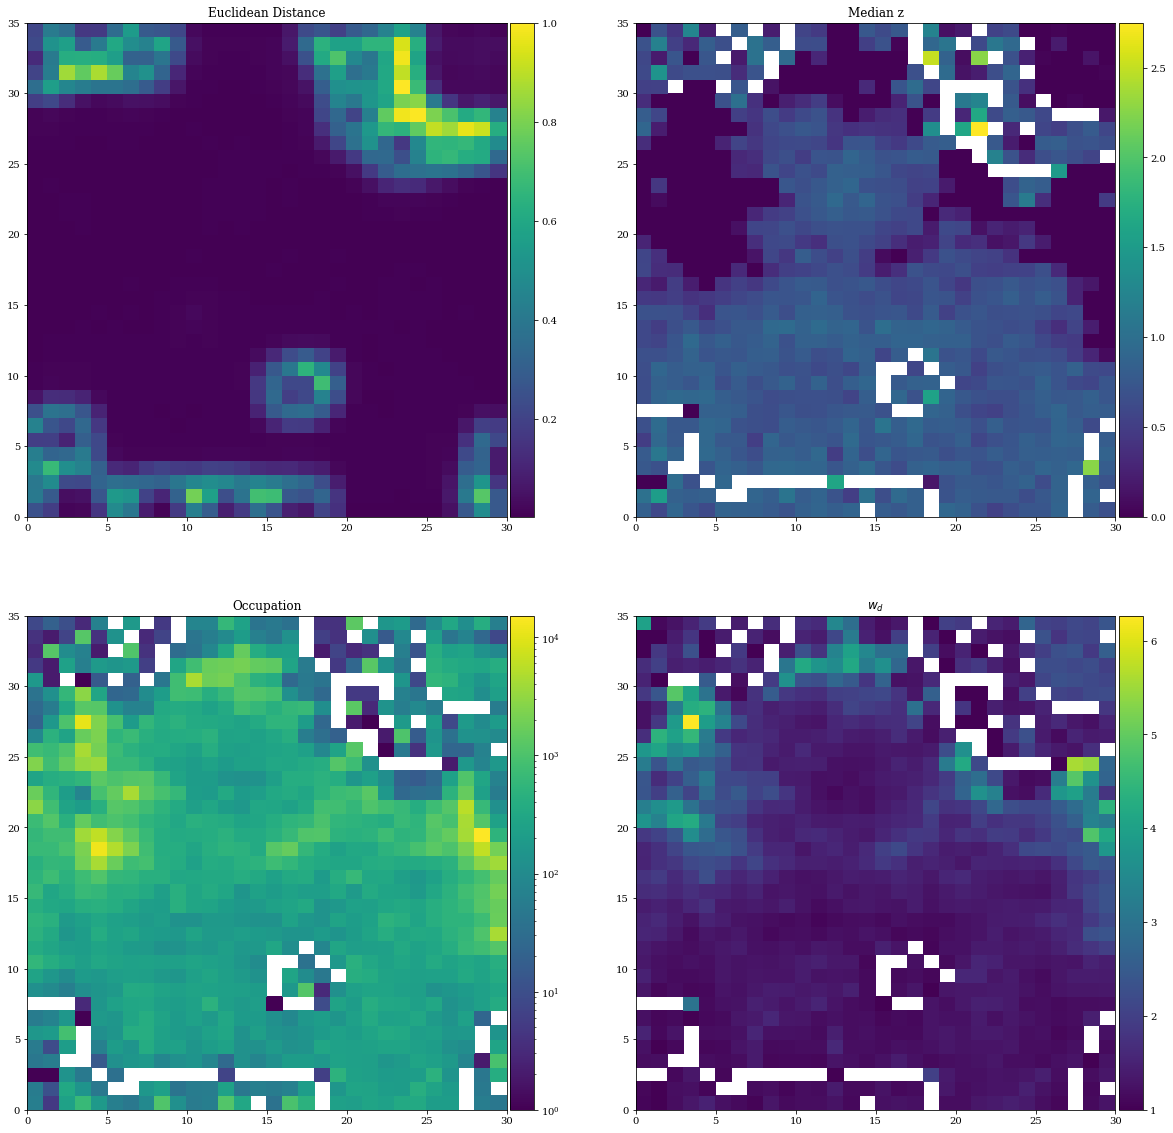

In [8]:
# plots indicated maps
plot_som(c3r2_table, som, win_map, 
         plot_dist_map = True, plot_med_z_map = True, plot_occ_map = True, plot_w_d_map = True)

In [9]:
# re-create histograms...
# obtain colors for each of these, based on KiDS-1000 SOM 
# (there is probably a better way to code this...) (re-work)
# add columns with colors
#k['MAG_GAAP_u-MAG_GAAP_g'] = k['MAG_GAAP_u'] - k['MAG_GAAP_g']
#k['MAG_GAAP_g-MAG_GAAP_r'] = k['MAG_GAAP_g'] - k['MAG_GAAP_r']
#k['MAG_GAAP_r-MAG_GAAP_i'] = k['MAG_GAAP_r'] - ki['MAG_GAAP_i']
#k['MAG_GAAP_i-MAG_GAAP_Z'] = k['MAG_GAAP_i'] - k['MAG_GAAP_Z']
#k['MAG_GAAP_Z-MAG_GAAP_Y'] = k['MAG_GAAP_Z'] - k['MAG_GAAP_Y']
#k['MAG_GAAP_Y-MAG_GAAP_J'] = k['MAG_GAAP_Y'] - k['MAG_GAAP_J']
#k['MAG_GAAP_J-MAG_GAAP_H'] = k['MAG_GAAP_J'] - k['MAG_GAAP_H']
#k['MAG_GAAP_H-MAG_GAAP_Ks'] = k['MAG_GAAP_H'] - k['MAG_GAAP_Ks']